# WELCOM TO OUR HEART DISEASE PREDICTION PROJECT

## Milestone 1: Data Collection, Exploration, and Preprocessing

### 1.Data collection:

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Set visualization settings
sns.set_style('whitegrid')  # Set seaborn style
plt.rcParams['figure.figsize'] = (10, 6)  # Set default figure size


In [40]:
# 1. Load the dataset
df = pd.read_csv('heartT.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


### 2.Data Exploration

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [4]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
df.shape

(1025, 14)

In [6]:
# Check for missing values in each column
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

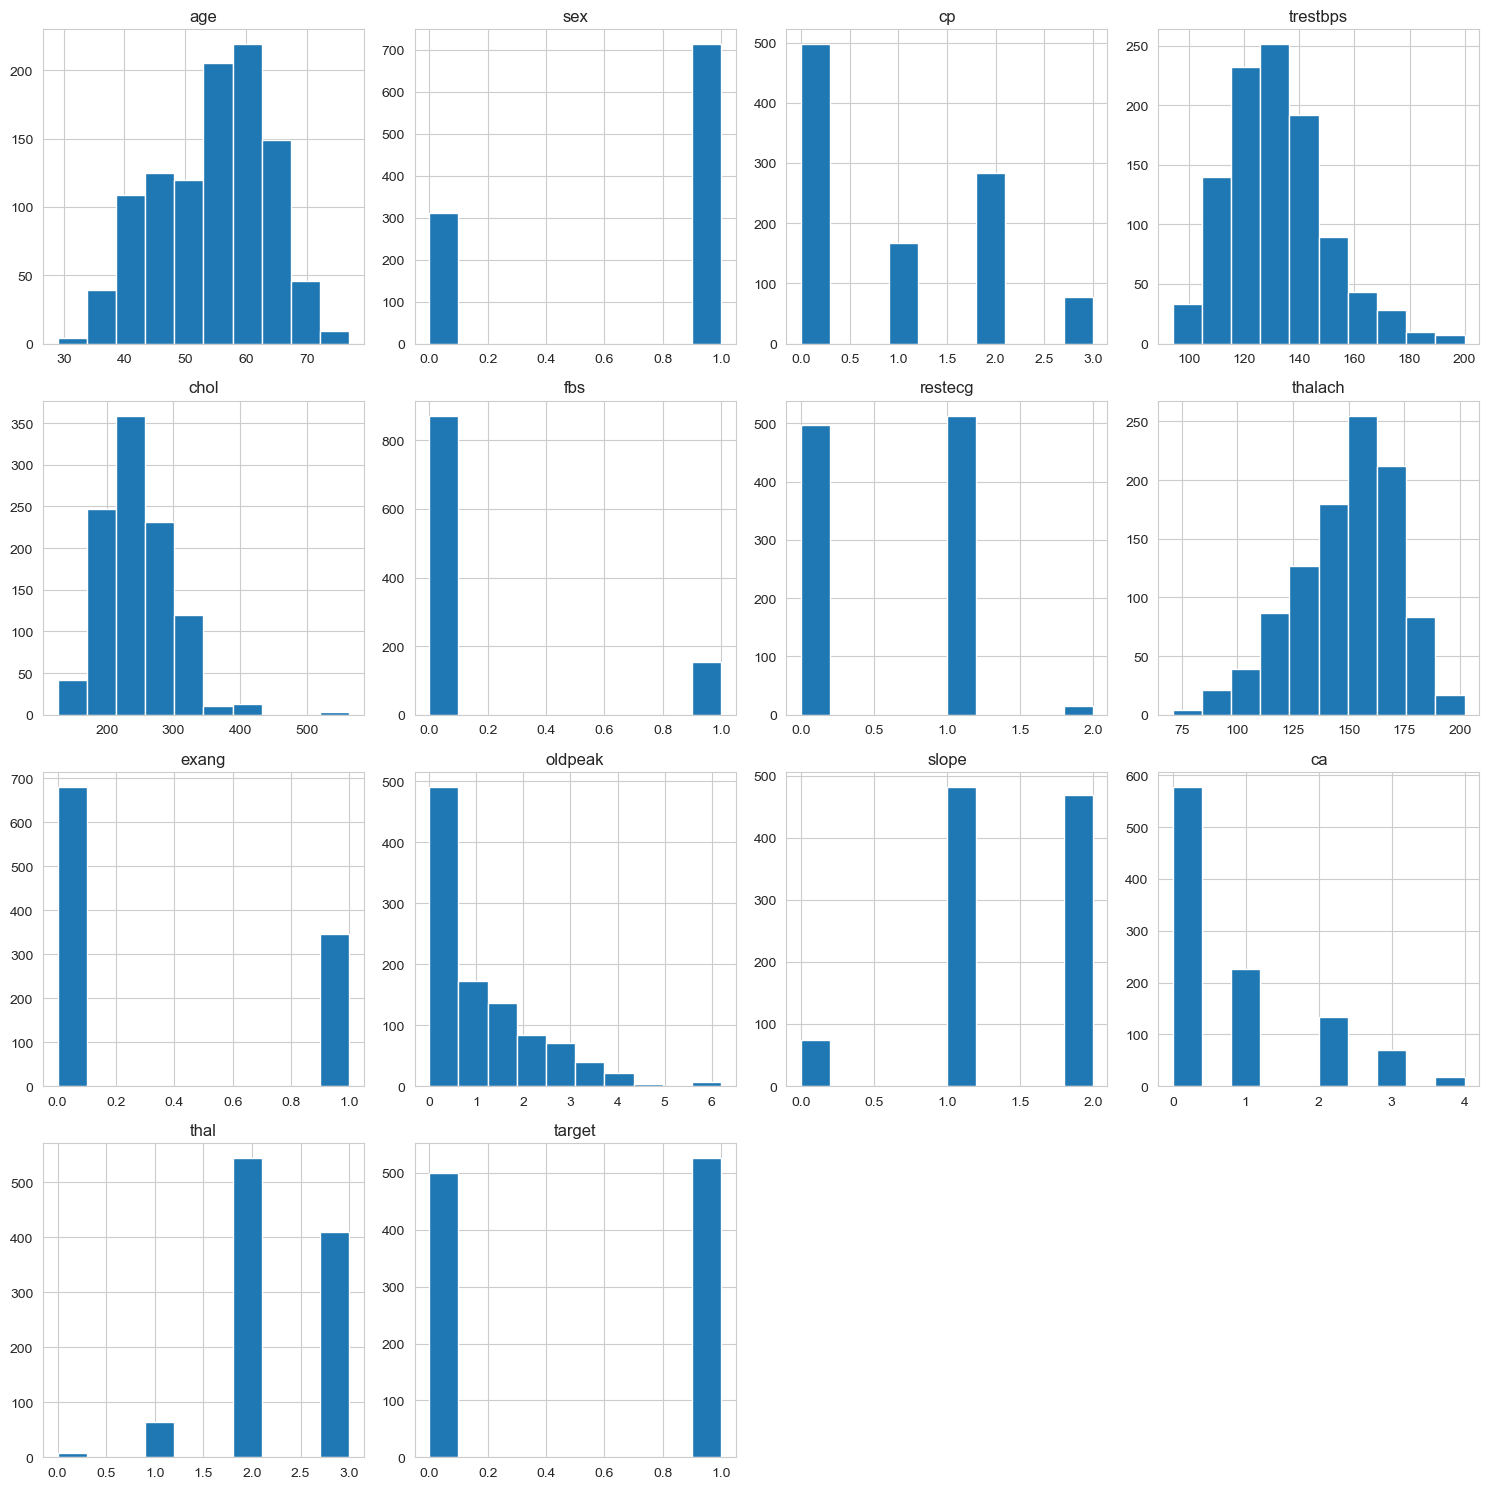

In [7]:
# Plot histograms for all numerical variables to see their distributions
df.hist(figsize=(15, 15))
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

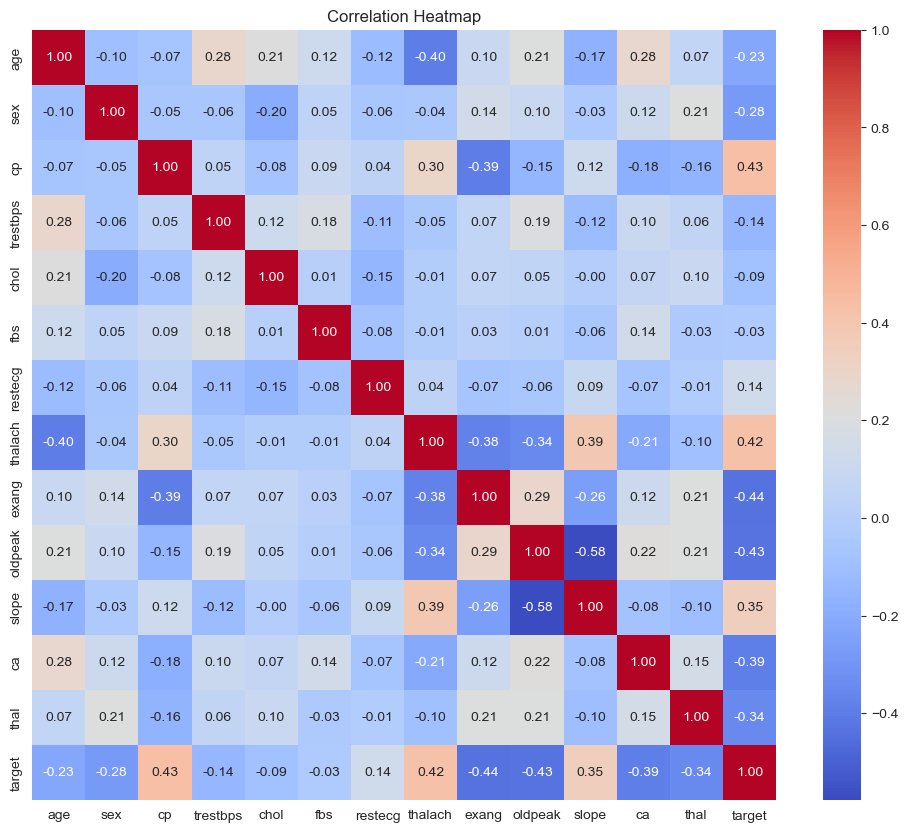

In [71]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
# Plot heatmap for correlation matrix
plt.figure(figsize=(12,10))
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

### 3.Data preprocessing

In [10]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])


In [11]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.479167,1.0,0.0,0.292453,0.196347,0.0,0.5,0.740458,0.0,0.161290,1.0,0.50,1.000000,0.0
1,0.500000,1.0,0.0,0.433962,0.175799,1.0,0.0,0.641221,1.0,0.500000,0.0,0.00,1.000000,0.0
2,0.854167,1.0,0.0,0.481132,0.109589,0.0,0.5,0.412214,1.0,0.419355,0.0,0.00,1.000000,0.0
3,0.666667,1.0,0.0,0.509434,0.175799,0.0,0.5,0.687023,0.0,0.000000,1.0,0.25,1.000000,0.0
4,0.687500,0.0,0.0,0.415094,0.383562,1.0,0.5,0.267176,0.0,0.306452,0.5,0.75,0.666667,0.0


## Milestone 2: Data Analysis and Visualization

### 1. Outliers detection and handling

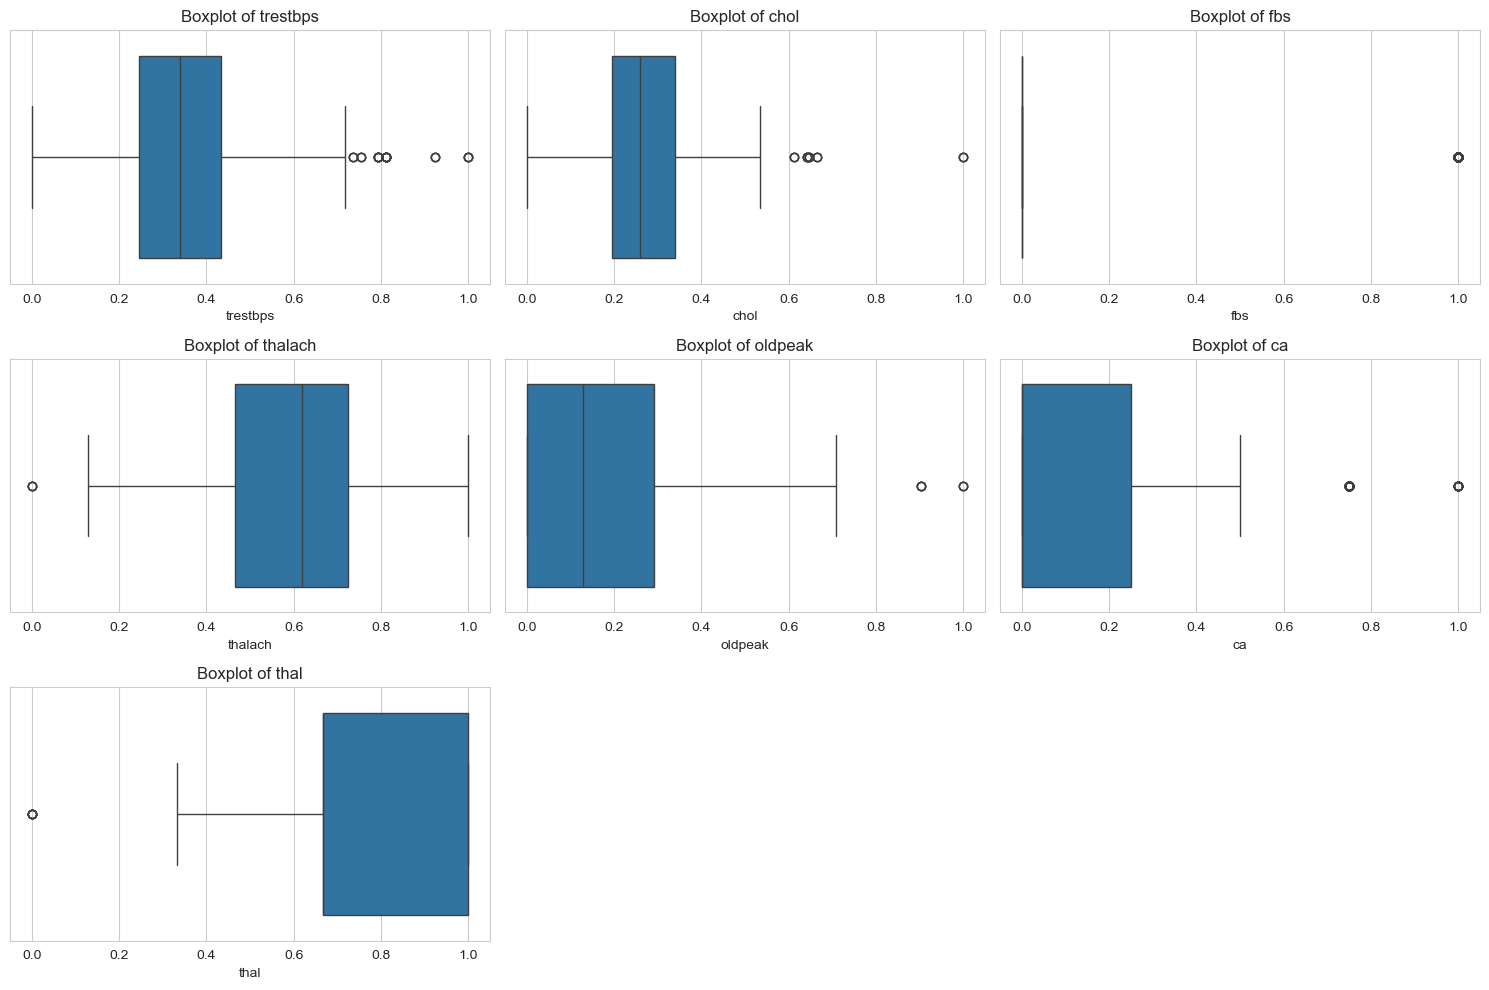

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of columns with outliers
cols_with_outliers = ['trestbps', 'chol', 'fbs', 'thalach', 'oldpeak', 'ca', 'thal']

# Plot boxplots for each column with outliers
plt.figure(figsize=(15, 10))
for i, col in enumerate(cols_with_outliers, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=df, x=col)
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


In [16]:
import pandas as pd

# List of columns with outliers to remove
cols_with_outliers = ['trestbps', 'chol', 'fbs', 'thalach', 'oldpeak', 'ca', 'thal']

def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Keep rows within the bounds
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

df_clean = df.copy()

# Loop over columns and iteratively remove outliers
for col in cols_with_outliers:
    df_clean = remove_outliers_iqr(df_clean, col)


In [22]:
print(df_clean.skew(numeric_only=True))

age        -0.177371
sex        -0.832416
cp          0.580705
trestbps    0.276280
chol        0.266805
fbs         0.000000
restecg    -0.006654
thalach    -0.482755
exang       0.754599
oldpeak     0.944266
slope      -0.503237
ca          1.075802
thal       -0.143249
target     -0.196376
dtype: float64


In [29]:
import numpy as np
df_clean['ca' + '_log'] = np.log1p(df_clean['ca'])


In [30]:
print(df_clean.skew(numeric_only=True))

age        -0.177371
sex        -0.832416
cp          0.580705
trestbps    0.276280
chol        0.266805
fbs         0.000000
restecg    -0.006654
thalach    -0.482755
exang       0.754599
oldpeak     0.944266
slope      -0.503237
ca          1.075802
thal       -0.143249
target     -0.196376
ca_log      0.950673
dtype: float64


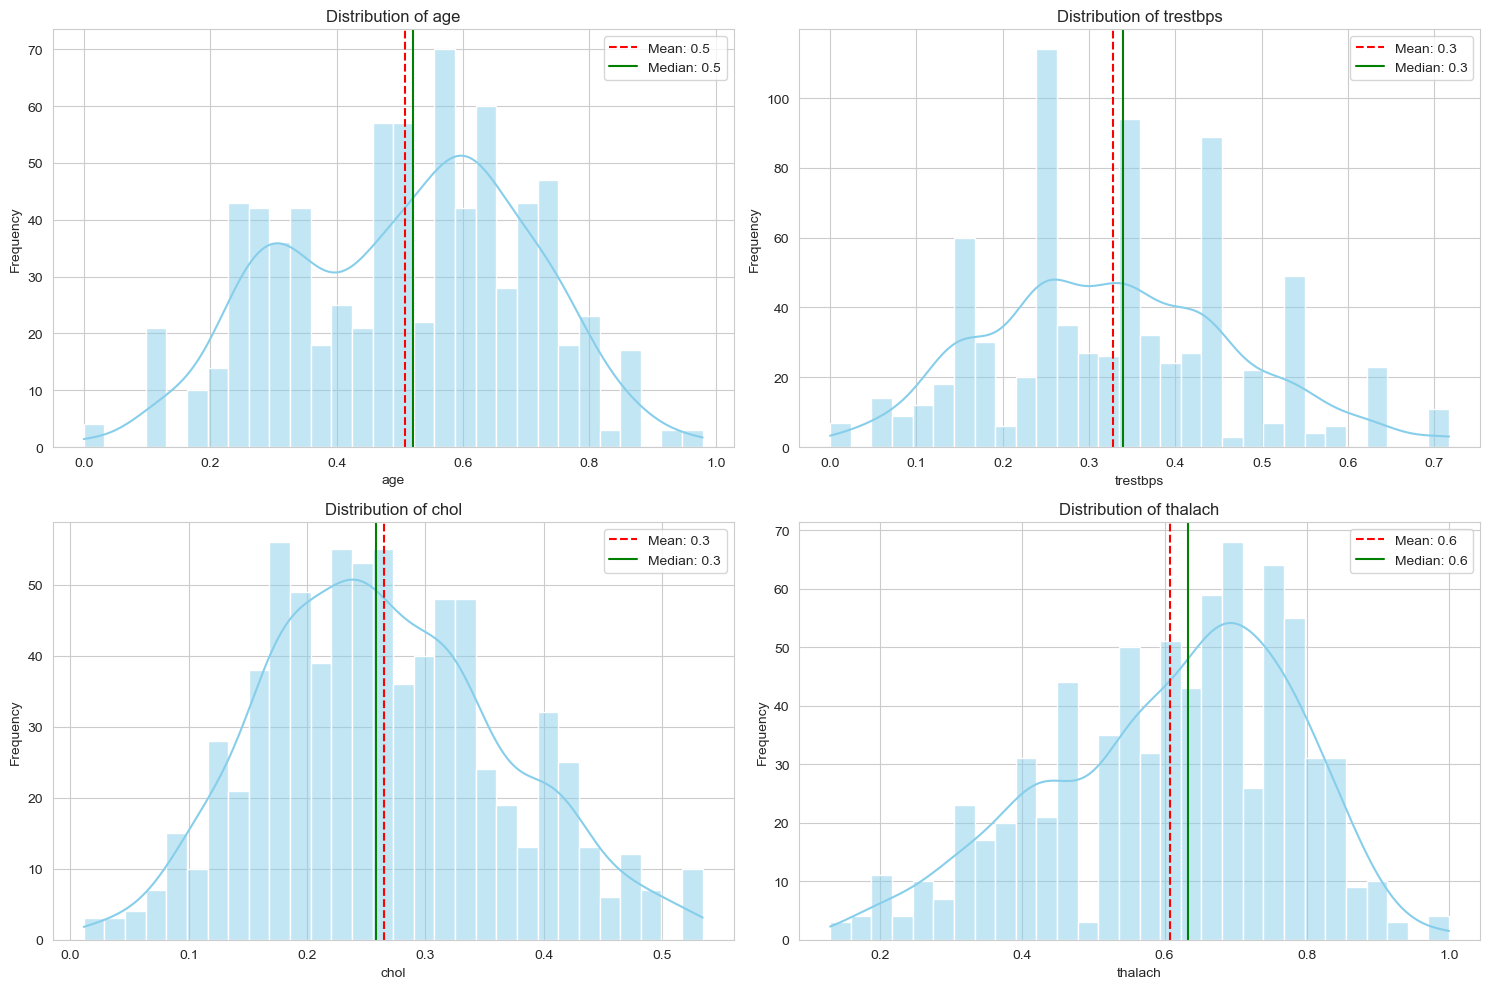

In [34]:
# Select numerical columns
numerical_cols = ['age','trestbps', 'chol' , 'thalach']


# Plot histograms and KDE for each numerical column
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 2, i)
    
    # Histogram with KDE
    sns.histplot(df_clean[col], kde=True, color='skyblue', bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    
    # Mark mean/median for reference"
    mean_val = df_clean[col].mean()
    median_val = df_clean[col].median()
    plt.axvline(mean_val, color='red', linestyle='--', label=f'Mean: {mean_val:.1f}')
    plt.axvline(median_val, color='green', linestyle='-', label=f'Median: {median_val:.1f}')
    plt.legend()

plt.tight_layout()
plt.show()

In [42]:
df_clean.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,ca_log
0,0.479167,1.0,0.0,0.292453,0.196347,0.0,0.5,0.740458,0.0,0.161290,1.0,0.50,1.000000,0.0,0.405465
2,0.854167,1.0,0.0,0.481132,0.109589,0.0,0.5,0.412214,1.0,0.419355,0.0,0.00,1.000000,0.0,0.000000
3,0.666667,1.0,0.0,0.509434,0.175799,0.0,0.5,0.687023,0.0,0.000000,1.0,0.25,1.000000,0.0,0.223144
5,0.604167,0.0,0.0,0.056604,0.278539,0.0,0.0,0.389313,0.0,0.161290,0.5,0.00,0.666667,1.0,0.000000
7,0.541667,1.0,0.0,0.622642,0.372146,0.0,0.0,0.564885,1.0,0.129032,0.5,0.25,1.000000,0.0,0.223144


### Data Visualization

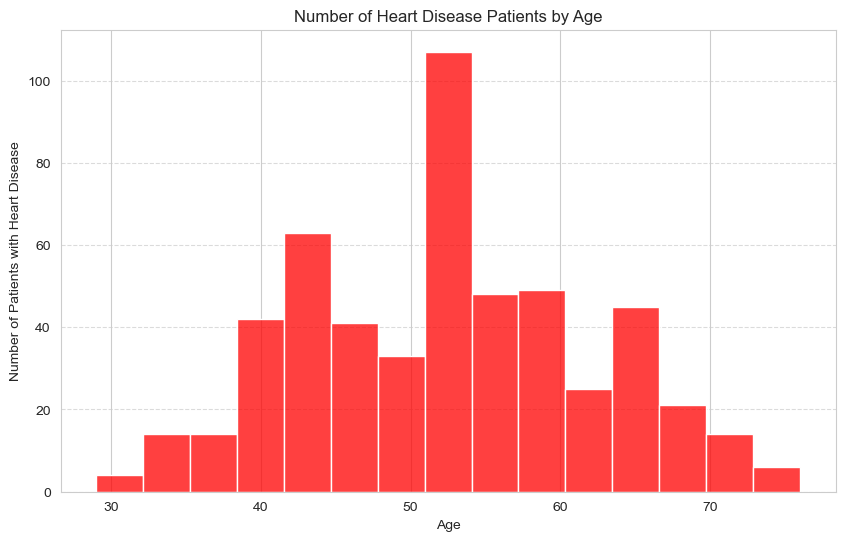

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data for heart disease patients only
heart_disease_patients = df[df['target'] == 1]

# Create histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=heart_disease_patients, x='age', bins=15, kde=False, color='red')
plt.title('Number of Heart Disease Patients by Age')
plt.xlabel('Age')
plt.ylabel('Number of Patients with Heart Disease')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

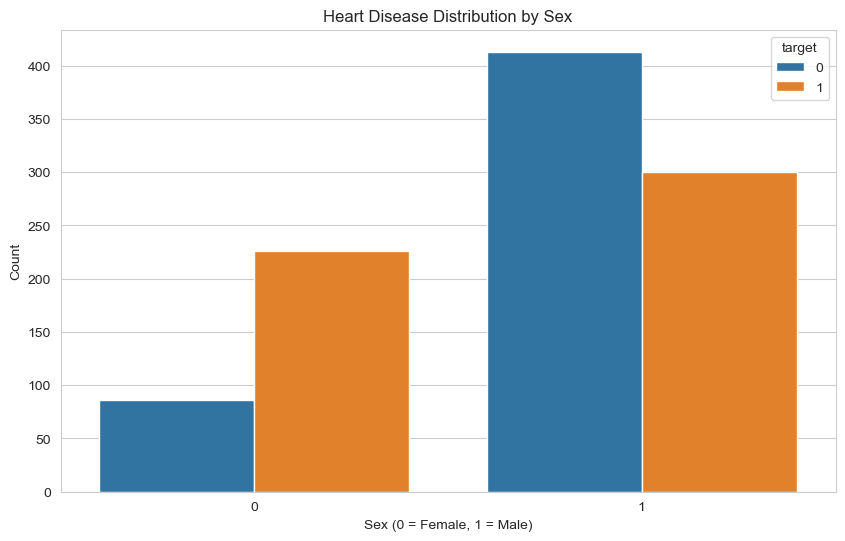

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot count of target per sex
sns.countplot(x='sex', hue='target', data=df)
plt.title('Heart Disease Distribution by Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.ylabel('Count')
plt.show()

In [46]:
# Group data by sex and calculate the sum of target (heart disease cases) for each sex
disease_counts = df.groupby('sex')['target'].sum()

# Print the number of females (sex=0) and males (sex=1) who have heart disease
print("Number of females with heart disease:", disease_counts[0])
print("Number of males with heart disease:", disease_counts[1])


Number of females with heart disease: 226
Number of males with heart disease: 300


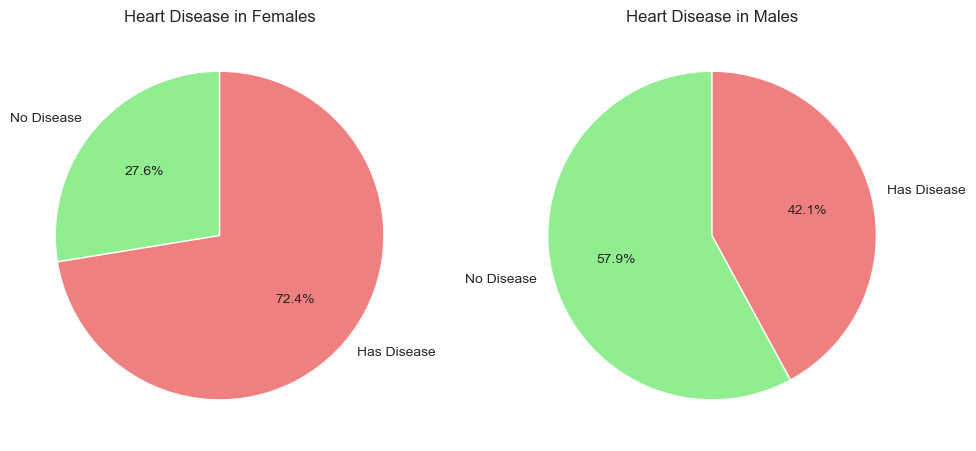

In [47]:
import matplotlib.pyplot as plt

# Count of target for each sex
female_counts = df[df['sex'] == 0]['target'].value_counts().sort_index()
male_counts = df[df['sex'] == 1]['target'].value_counts().sort_index()

# Labels and colors
labels = ['No Disease', 'Has Disease']
colors = ['lightgreen', 'lightcoral']

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Female pie chart
axes[0].pie(female_counts, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
axes[0].set_title('Heart Disease in Females')

# Male pie chart
axes[1].pie(male_counts, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
axes[1].set_title('Heart Disease in Males')

plt.tight_layout()
plt.show()


Samples count per cp type:
cp
0    497
1    167
2    284
3     77
Name: count, dtype: int64

Heart disease rate per cp type (%):
cp
0    24.547284
1    80.239521
2    77.112676
3    66.233766
Name: target, dtype: float64


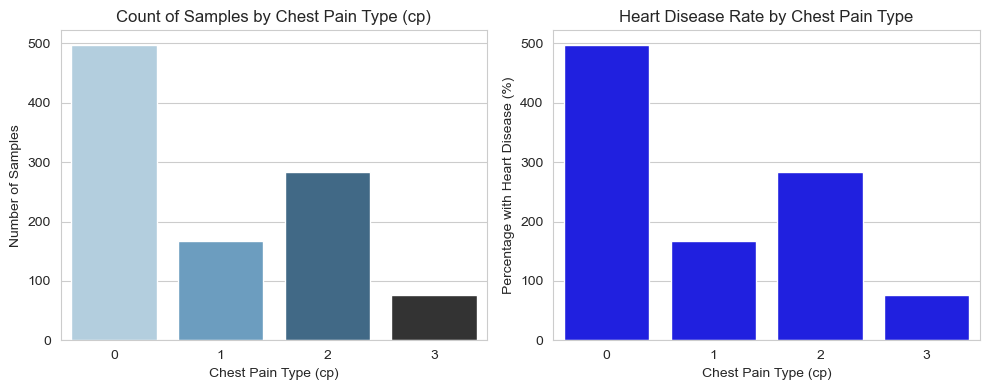

In [48]:
# Count samples per cp type
cp_counts = df['cp'].value_counts().sort_index()
print("Samples count per cp type:")
print(cp_counts)

# Calculate heart disease rate per cp type
cp_heart_disease_rate = df.groupby('cp')['target'].mean() * 100

print("\nHeart disease rate per cp type (%):")
print(cp_heart_disease_rate)

# Plot count of samples per cp type
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.barplot(x=cp_counts.index, y=cp_counts.values, palette='Blues_d', hue=cp_counts.index, legend=False)

plt.title('Count of Samples by Chest Pain Type (cp)')
plt.xlabel('Chest Pain Type (cp)')
plt.ylabel('Number of Samples')

# Plot heart disease rate per cp type
plt.subplot(1, 2, 2)
sns.barplot(x=cp_counts.index, y=cp_counts.values, color='blue')
plt.title('Heart Disease Rate by Chest Pain Type')
plt.xlabel('Chest Pain Type (cp)')
plt.ylabel('Percentage with Heart Disease (%)')

plt.tight_layout()
plt.show()

Samples count per exang value:
exang
0    680
1    345
Name: count, dtype: int64

Heart disease rate by exang value (%):
exang
0    66.911765
1    20.579710
Name: target, dtype: float64


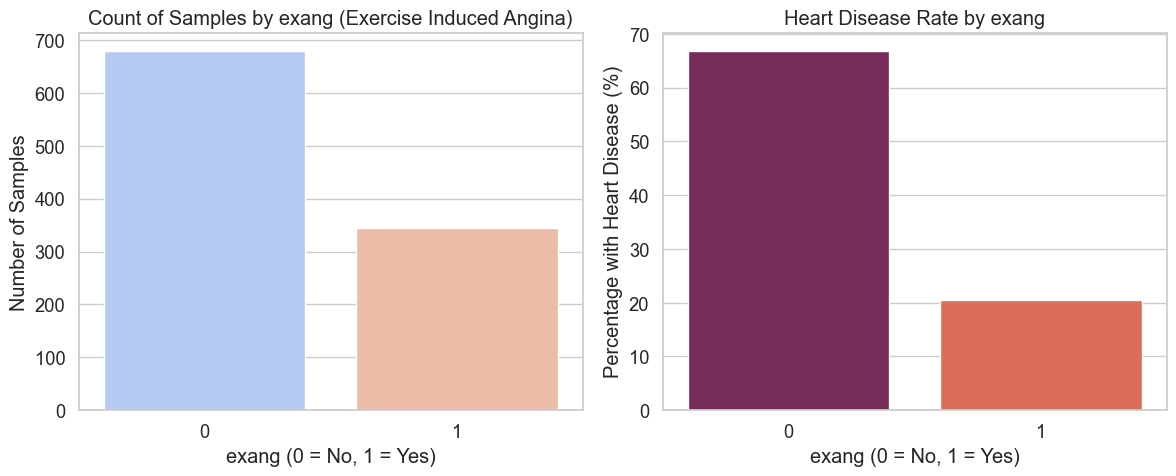

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate heart disease rate by exang
exang_counts = df['exang'].value_counts()
exang_heart_disease_rate = df.groupby('exang')['target'].mean() * 100

print("Samples count per exang value:")
print(exang_counts)

print("\nHeart disease rate by exang value (%):")
print(exang_heart_disease_rate)

# Plot for exang
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.barplot(x=exang_counts.index, y=exang_counts.values, palette='coolwarm')
plt.title('Count of Samples by exang (Exercise Induced Angina)')
plt.xlabel('exang (0 = No, 1 = Yes)')
plt.ylabel('Number of Samples')

plt.subplot(1, 2, 2)
sns.barplot(x=exang_heart_disease_rate.index, y=exang_heart_disease_rate.values, palette='rocket')
plt.title('Heart Disease Rate by exang')
plt.xlabel('exang (0 = No, 1 = Yes)')
plt.ylabel('Percentage with Heart Disease (%)')

plt.tight_layout()
plt.show()


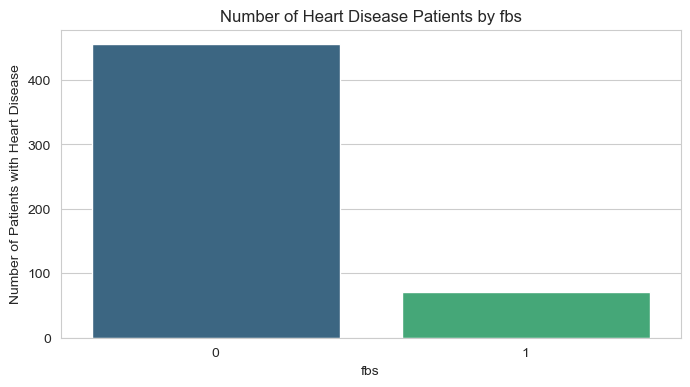

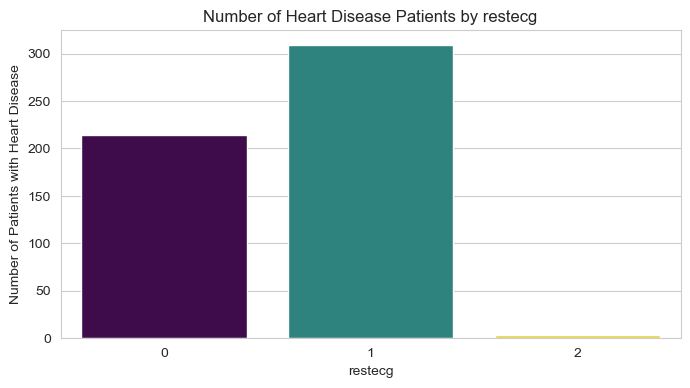

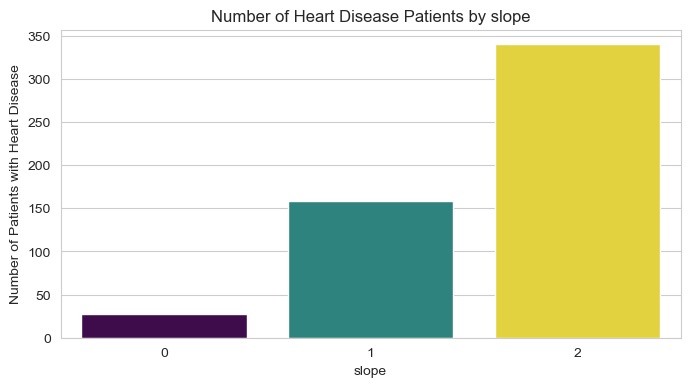

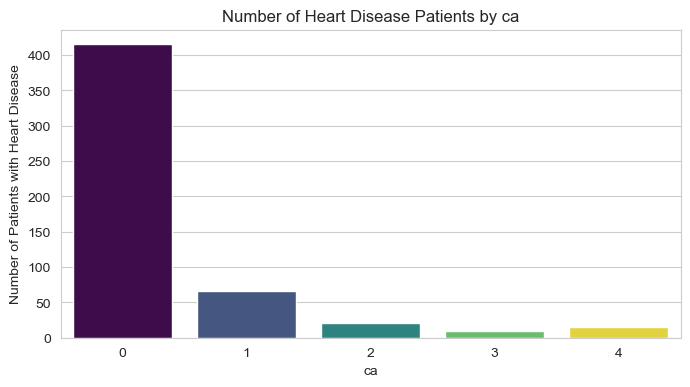

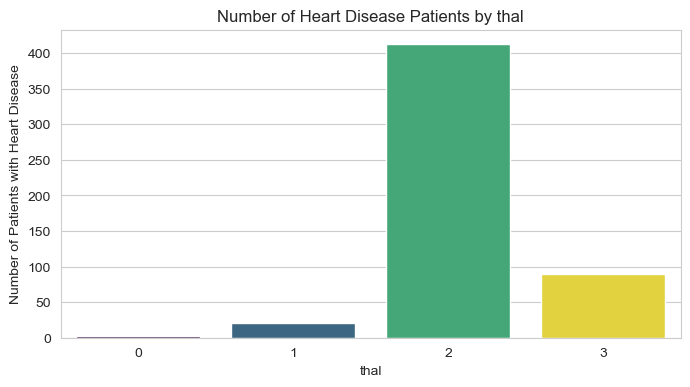

In [56]:
columns_to_plot = [ 'fbs', 'restecg', 'slope', 'ca', 'thal']

for col in columns_to_plot:
    plt.figure(figsize=(8,4))
    
    # Group by column value and sum target (number of patients with heart disease)
    data_plot = df.groupby(col)['target'].sum().reset_index()
    
    sns.barplot(x=col, y='target', data=data_plot, hue=col, palette='viridis', legend=False)
    plt.title(f'Number of Heart Disease Patients by {col}')
    plt.ylabel('Number of Patients with Heart Disease')
    plt.xlabel(col)
    plt.show()

### Age group dashboard

In [62]:
import pandas as pd
from dash import Dash, dcc, html
import plotly.express as px

# Load your dataset CSV file (adjust path as needed)
df = pd.read_csv('heart.csv')

# Example: If you don't have an 'age_group' column,
# create it by binning the 'age' column
bins = [25, 34, 44, 54, 64, 79]
labels = ['25-34', '35-44', '45-54', '55-64', '65-79']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=True, include_lowest=True)

# Count number of patients per age group
age_group_counts = df['age_group'].value_counts().sort_index()
age_group_df = age_group_counts.reset_index()
age_group_df.columns = ['age_group', 'patient_count']

# Create the Dash app
app = Dash(__name__)

# Create bar chart of patient count by age group
fig = px.bar(
    age_group_df,
    x='age_group',
    y='patient_count',
    title='Number of Patients per Age Group',
    labels={'age_group': 'Age Group', 'patient_count': 'Number of Patients'},
    template='plotly_white'
)

# Layout
app.layout = html.Div(children=[
    html.H1('Patient Count by Age Group Dashboard'),
    dcc.Graph(id='patient-count-bar', figure=fig)
])

if __name__ == '__main__':
    app.run_server(debug=True)


## Milestone 3: Predictive Model Development and Optimization

In [94]:
# Calculate correlation of all columns with 'target'
correlations = df_clean.corr()['target'].abs()

# Filter correlations with absolute value greater than 0.3
filtered_corr = correlations[correlations.abs() > 0.3]

# Sort the filtered correlations by absolute value in descending order
filtered_corr = filtered_corr.sort_values(key=abs, ascending=False)

# Print the filtered correlations
print(filtered_corr)


target     1.000000
ca_log     0.464166
ca         0.456208
thal       0.454862
oldpeak    0.443599
thalach    0.416945
exang      0.416859
cp         0.374184
sex        0.367541
slope      0.319420
Name: target, dtype: float64


### 1.Model Training and evaluation:

In [110]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler

# Step 1: Select features and target
features = ['ca_log', 'thal', 'oldpeak', 'thalach', 'exang', 'cp', 'sex', 'slope']
X = df_clean[features]
y = df_clean['target']

# Step 2: Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Split dataset into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 4: Build Logistic Regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Step 5: Predict on test set
y_pred = model.predict(X_test)

# Step 6: Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

y_train_pred = model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

print("Train Accuracy:", train_accuracy)

Accuracy: 0.8571428571428571

Classification Report:
               precision    recall  f1-score   support

         0.0       0.86      0.78      0.82        64
         1.0       0.85      0.91      0.88        90

    accuracy                           0.86       154
   macro avg       0.86      0.85      0.85       154
weighted avg       0.86      0.86      0.86       154

Train Accuracy: 0.8666666666666667


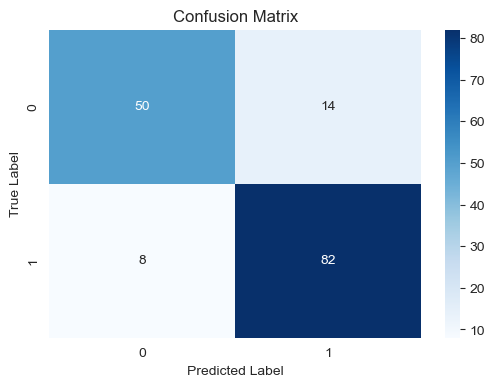

In [112]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted Label')  # Label for x-axis
plt.ylabel('True Label')       # Label for y-axis
plt.title('Confusion Matrix')  # Title of the plot
plt.show()


## Milestone 4: Deployment

In [114]:
import joblib

# Save the trained model
joblib.dump(model, 'heart_disease_model.pkl')


['heart_disease_model.pkl']

In [118]:
import streamlit

In [ ]:
!streamlit run app.py